### Importing the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

import warnings 
warnings.filterwarnings('ignore')

### Loading and understanding the dataset

In [2]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.shape

(768, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
# Check for duplicated entries
df.duplicated().sum()

0

In [7]:
# Check for null values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Exploratory Data Analysis

In [8]:
# Stats summary 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


#### Data Visualization

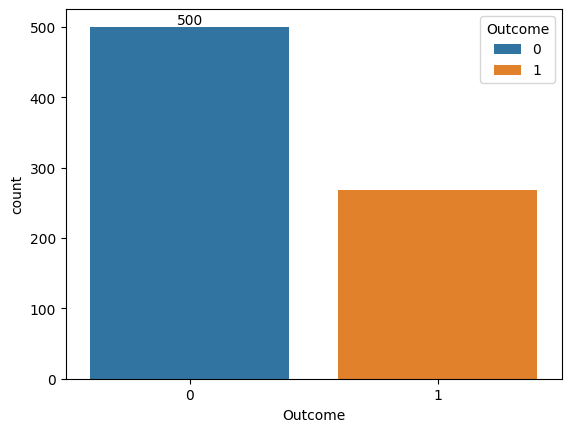

In [9]:
# Distribution of Outcome(target) column
ax = sns.countplot(x=df['Outcome'],data=df,hue='Outcome')
ax.bar_label(ax.containers[0])
plt.show()

The dataset has a class imbalance, with more instances of people without diabetes compared to those with diabetes.

<Axes: xlabel='Pregnancies', ylabel='count'>

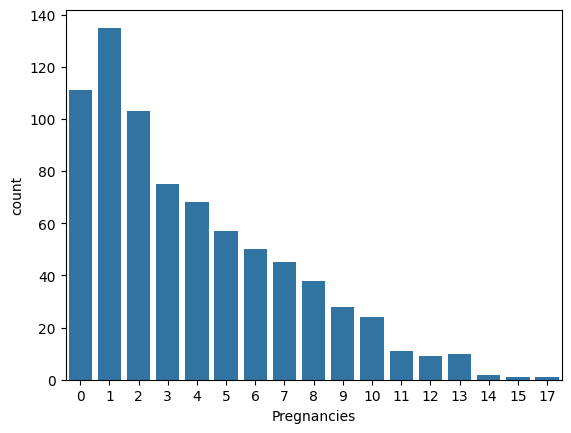

In [10]:
# Pregnancies count
sns.countplot(x=df['Pregnancies'])

The dataset has a higher number of individuals with one pregnancy compared to other pregnancy counts.

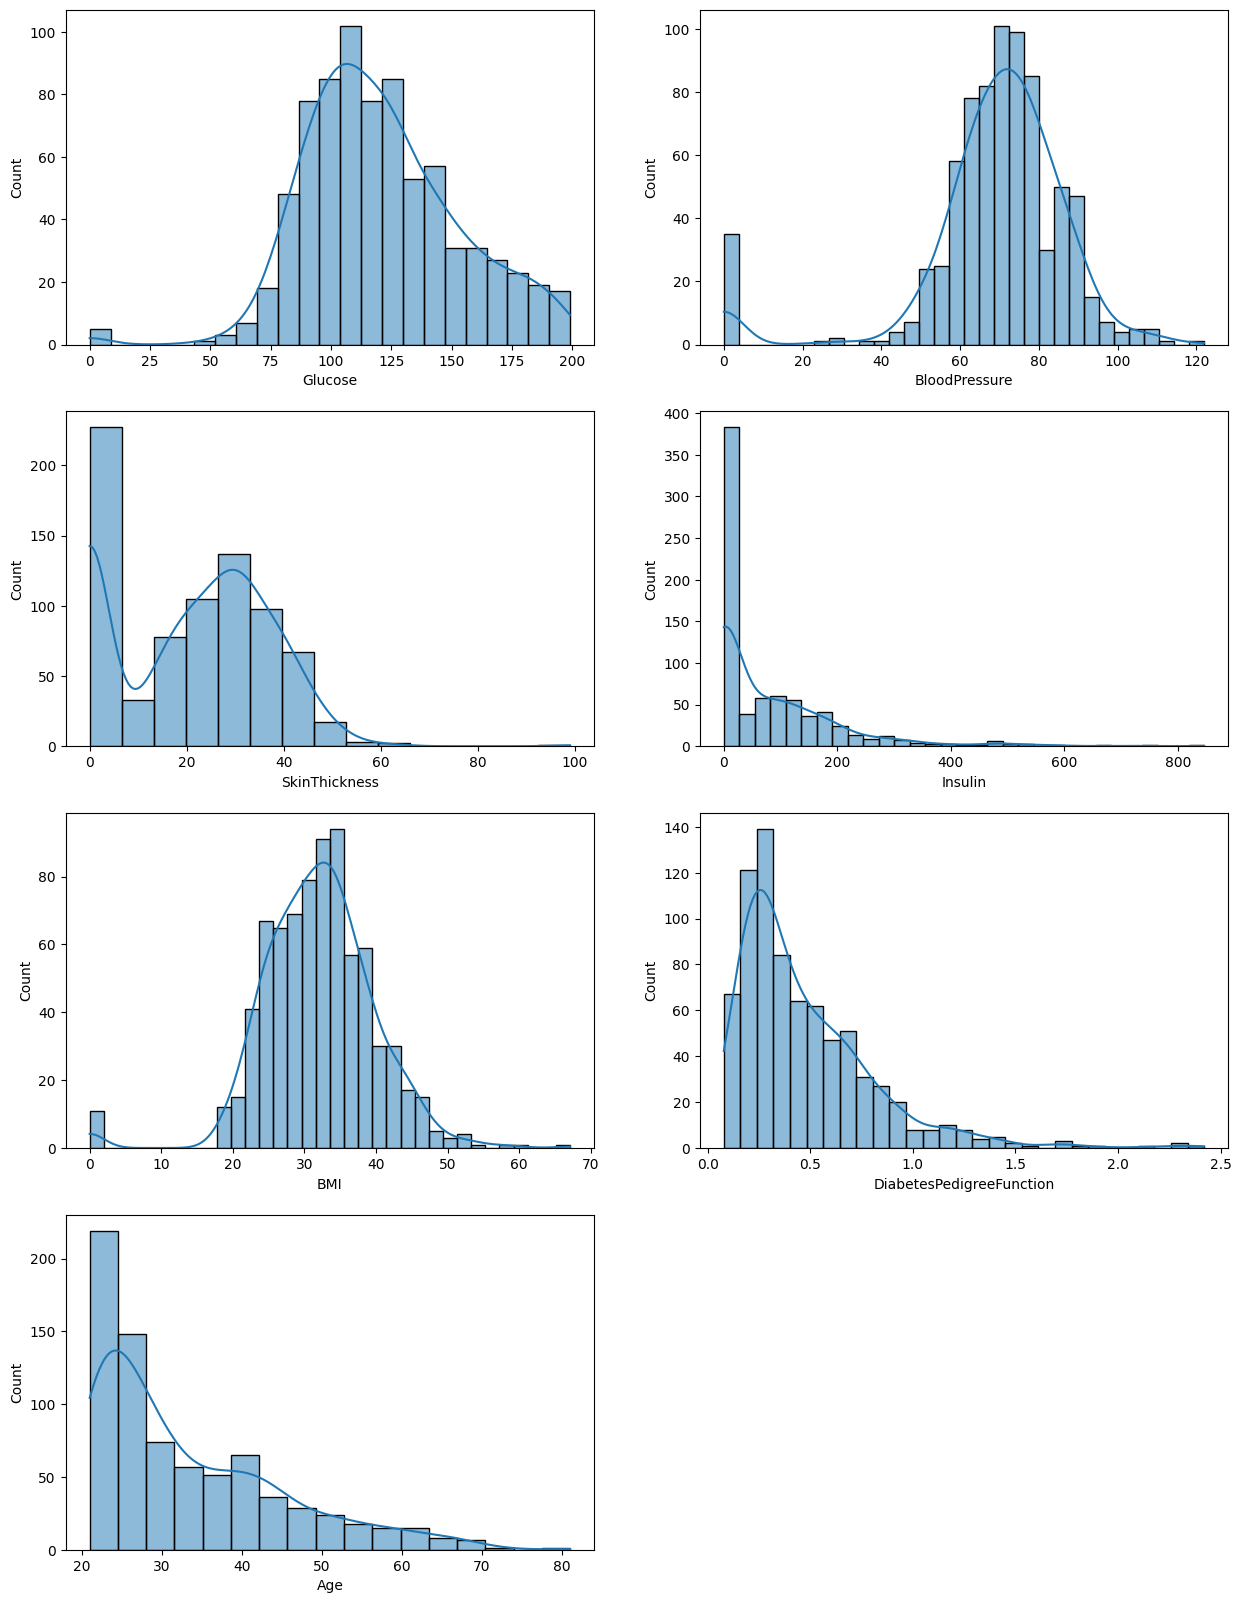

In [11]:
# Distribution of Numerical Features
cols = df.columns[1:-1]
plt.figure(figsize=(15,20))
for i,col in enumerate(cols):
    plt.subplot(4,2,i+1)
    sns.histplot(x=df[col],kde=True)

In [12]:
df.head(1)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1


<Axes: xlabel='Outcome', ylabel='Pregnancies'>

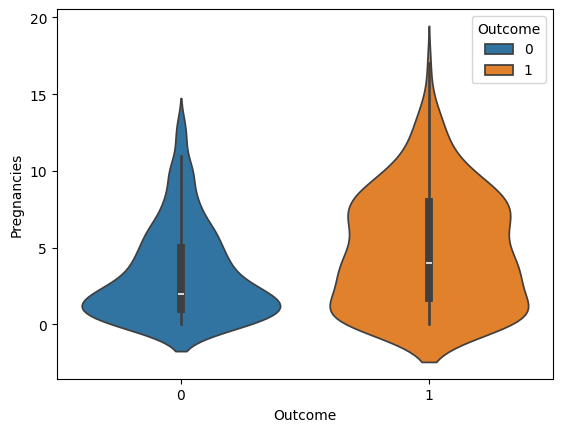

In [13]:
# Pregnancies vs Outcome
sns.violinplot(x=df['Outcome'],y=df['Pregnancies'],data=df,hue='Outcome')

A higher number of pregnancies may be associated with an increased likelihood of developing diabetes.

<Axes: xlabel='Outcome', ylabel='Glucose'>

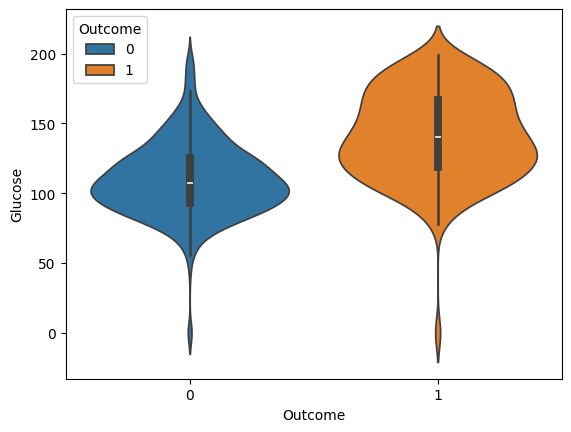

In [14]:
# Glucose vs Outcome
sns.violinplot(x=df['Outcome'],y=df['Glucose'],data=df,hue='Outcome')

The higher the glucose level, the more likely they are to be diabetic.

<Axes: xlabel='Outcome', ylabel='Insulin'>

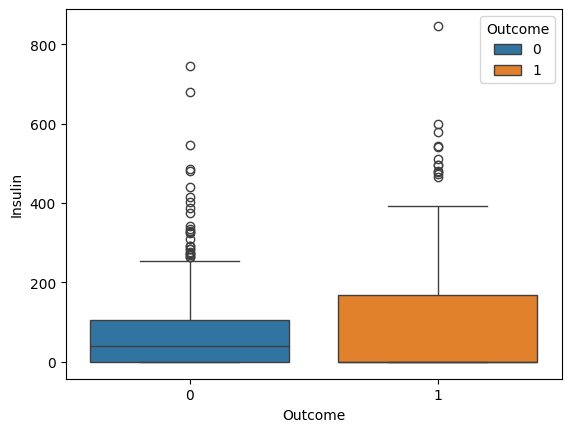

In [15]:
# Insulin vs Outcome
sns.boxplot(x=df['Outcome'],y=df['Insulin'],data=df,hue='Outcome')

Higher insulin levels are typically linked to diabetes, but some non-diabetic individuals may also have elevated insulin due to insulin resistance. These individuals may be in the early stages of metabolic disturbance and are at risk of developing diabetes if the issue is not addressed.

<Axes: xlabel='Outcome', ylabel='BMI'>

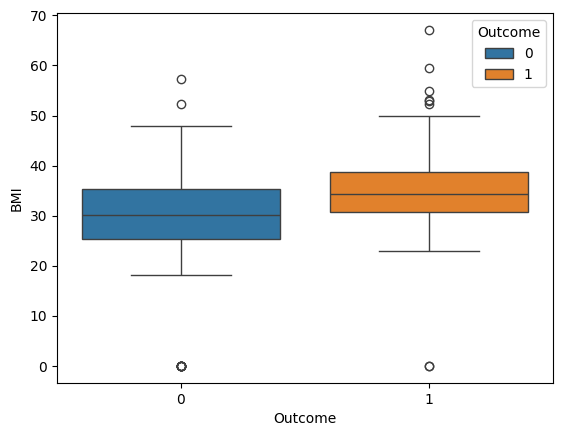

In [16]:
# BMI vs Outcome
sns.boxplot(x=df['Outcome'],y=df['BMI'],data=df,hue='Outcome')

People with a high BMI are more likely to be diabetic

<Axes: xlabel='Outcome', ylabel='DiabetesPedigreeFunction'>

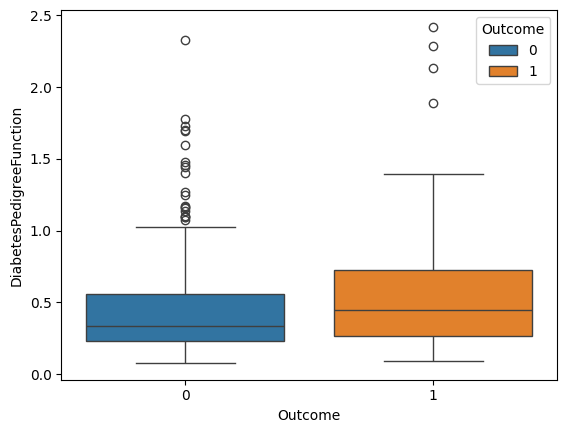

In [17]:
# DiabetesPedigreeFunction vs Outcome
sns.boxplot(x=df['Outcome'],y=df['DiabetesPedigreeFunction'],data=df,hue='Outcome')

Individuals with a family history of diabetes are more likely to develop the condition themselves, as the DPF reflects the genetic risk factor associated with the disease.

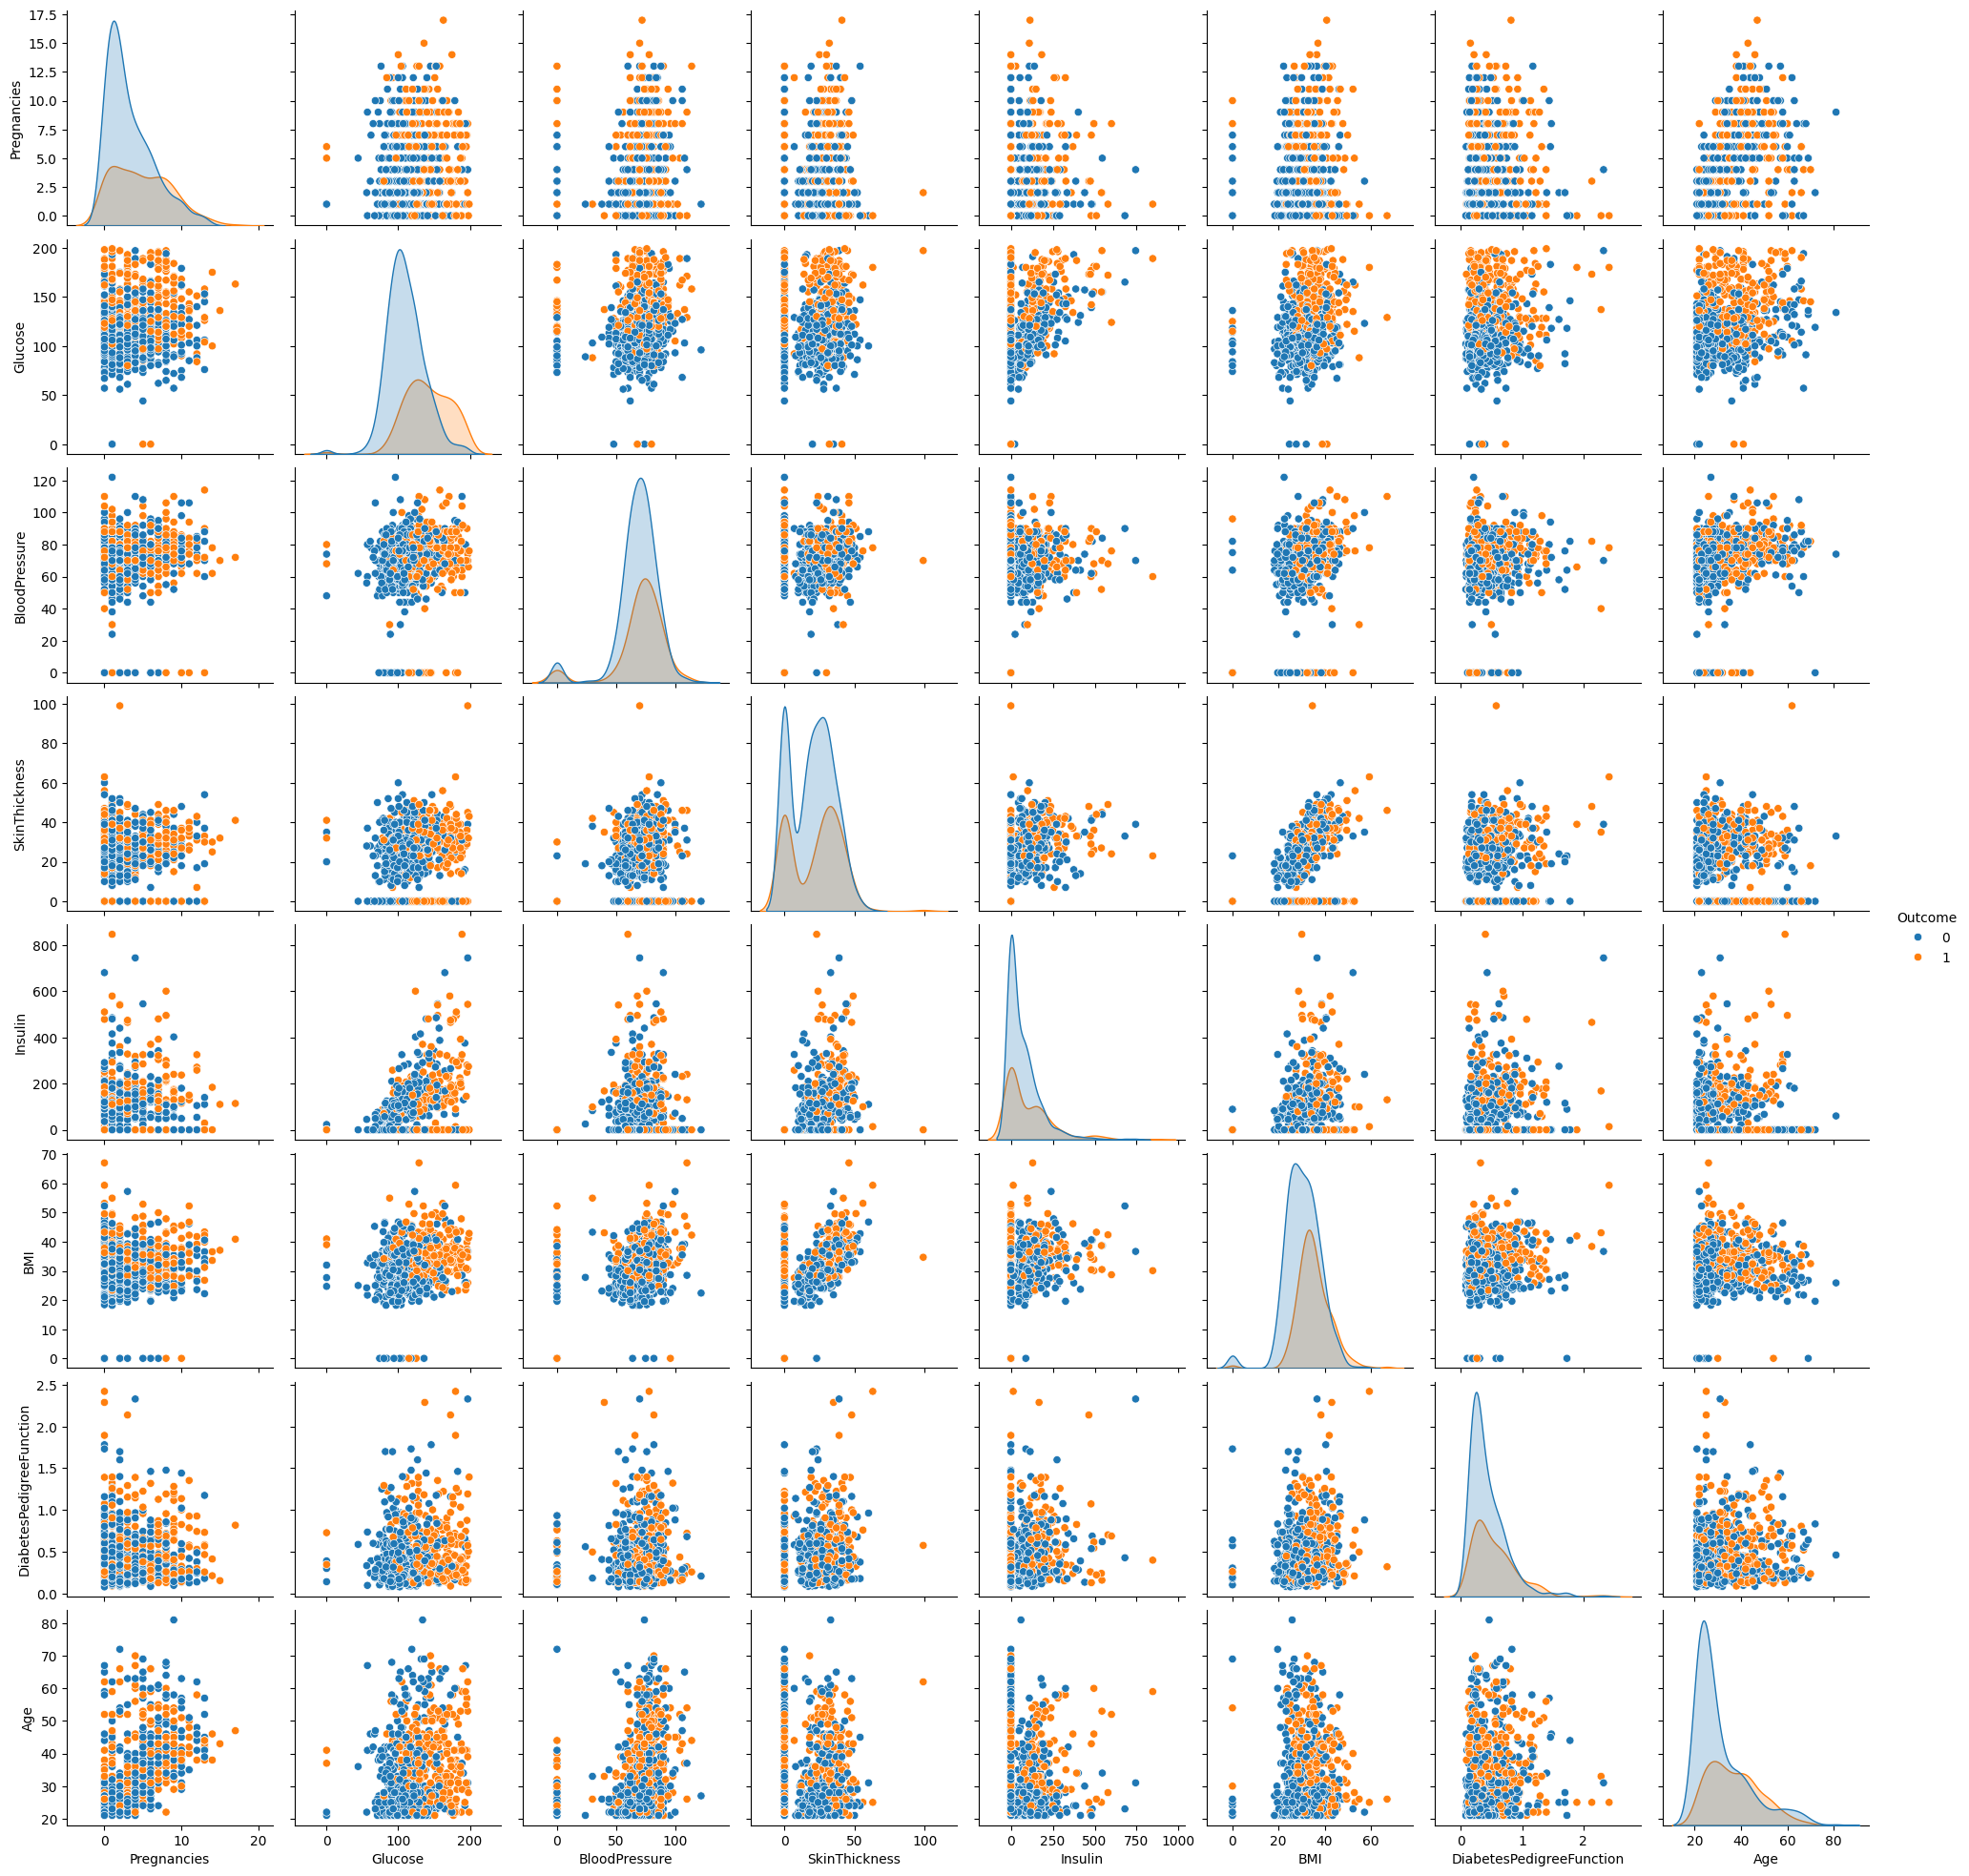

In [18]:
# Pair Plot
sns.pairplot(data=df,hue='Outcome')

<Axes: >

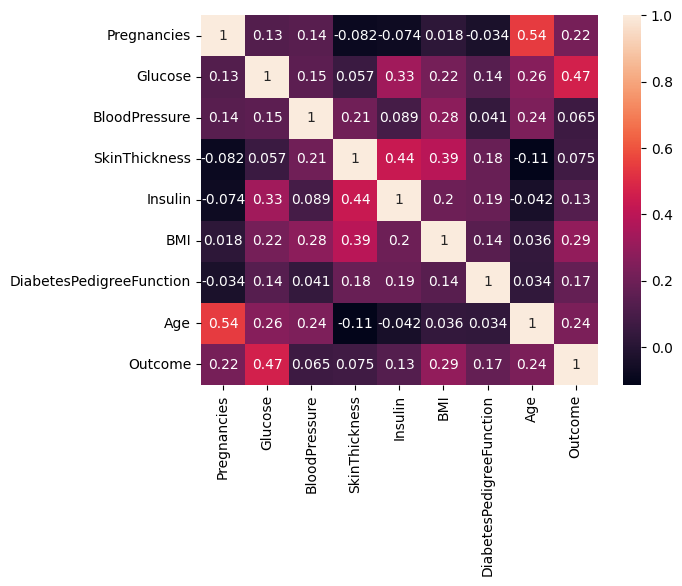

In [19]:
# Correlation Heatmap
sns.heatmap(data=df.corr(),annot=True)

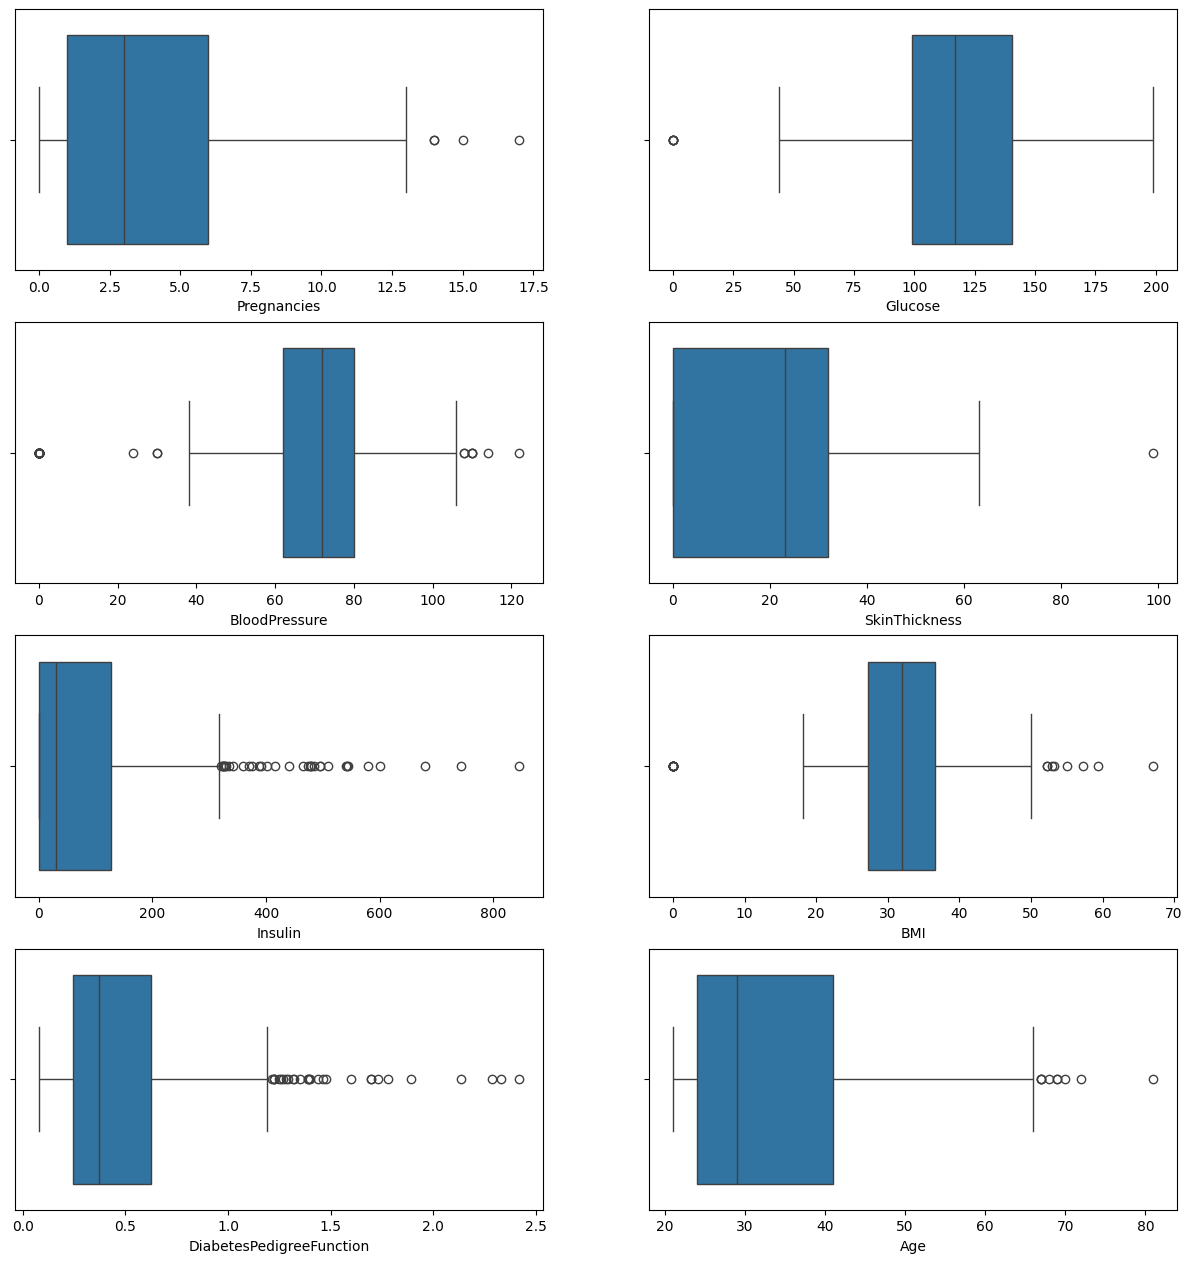

In [20]:
# Check for outliers
plt.figure(figsize=(15,40))
for i,column in enumerate(df.columns):
    if column != 'Outcome':
        plt.subplot(10,2,i+1)
        sns.boxplot(x=df[column])
plt.show()

### Data Preprocessing

#### Handling null values
- From the dataset,some features have a minimum value of 0.
- Here 0 values valid for Pregnancies column.But for other features do not have a minimum value 0.Lets check this data.

In [21]:
# Replacing zero value with Nan
for column in df.columns:
    if column not in['Outcome','Pregnancies']:
        df[column] = df[column].replace(0,np.NaN)

In [22]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [23]:
# Replacing NaN values based on distribution
df["Glucose"].fillna(df["Glucose"].mean(), inplace = True)
df["BloodPressure"].fillna(df["BloodPressure"].mean(), inplace = True)
df["SkinThickness"].fillna(df["SkinThickness"].mean(), inplace = True)
df["Insulin"].fillna(df["Insulin"].median(), inplace = True) # Skewed
df["BMI"].fillna(df["BMI"].mean(), inplace = True)

In [24]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

#### Handling Outliers
Handling outliers by using the Interquartile Range (IQR) method. If a value is below the lower bound, we replace it with the lower bound. Similarly, if a value exceeds the upper bound, we replace it with the upper bound. All other values remain unchanged.

In [25]:
for column in df.columns:
    if column != 'Outcome':
        Q1 = np.quantile(df[column], 0.25)  
        Q3 = np.quantile(df[column], 0.75)  
        IQR = Q3 - Q1  
        lower_bound = Q1 - 1.5 * IQR  
        upper_bound = Q3 + 1.5 * IQR  
        
        df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
        df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

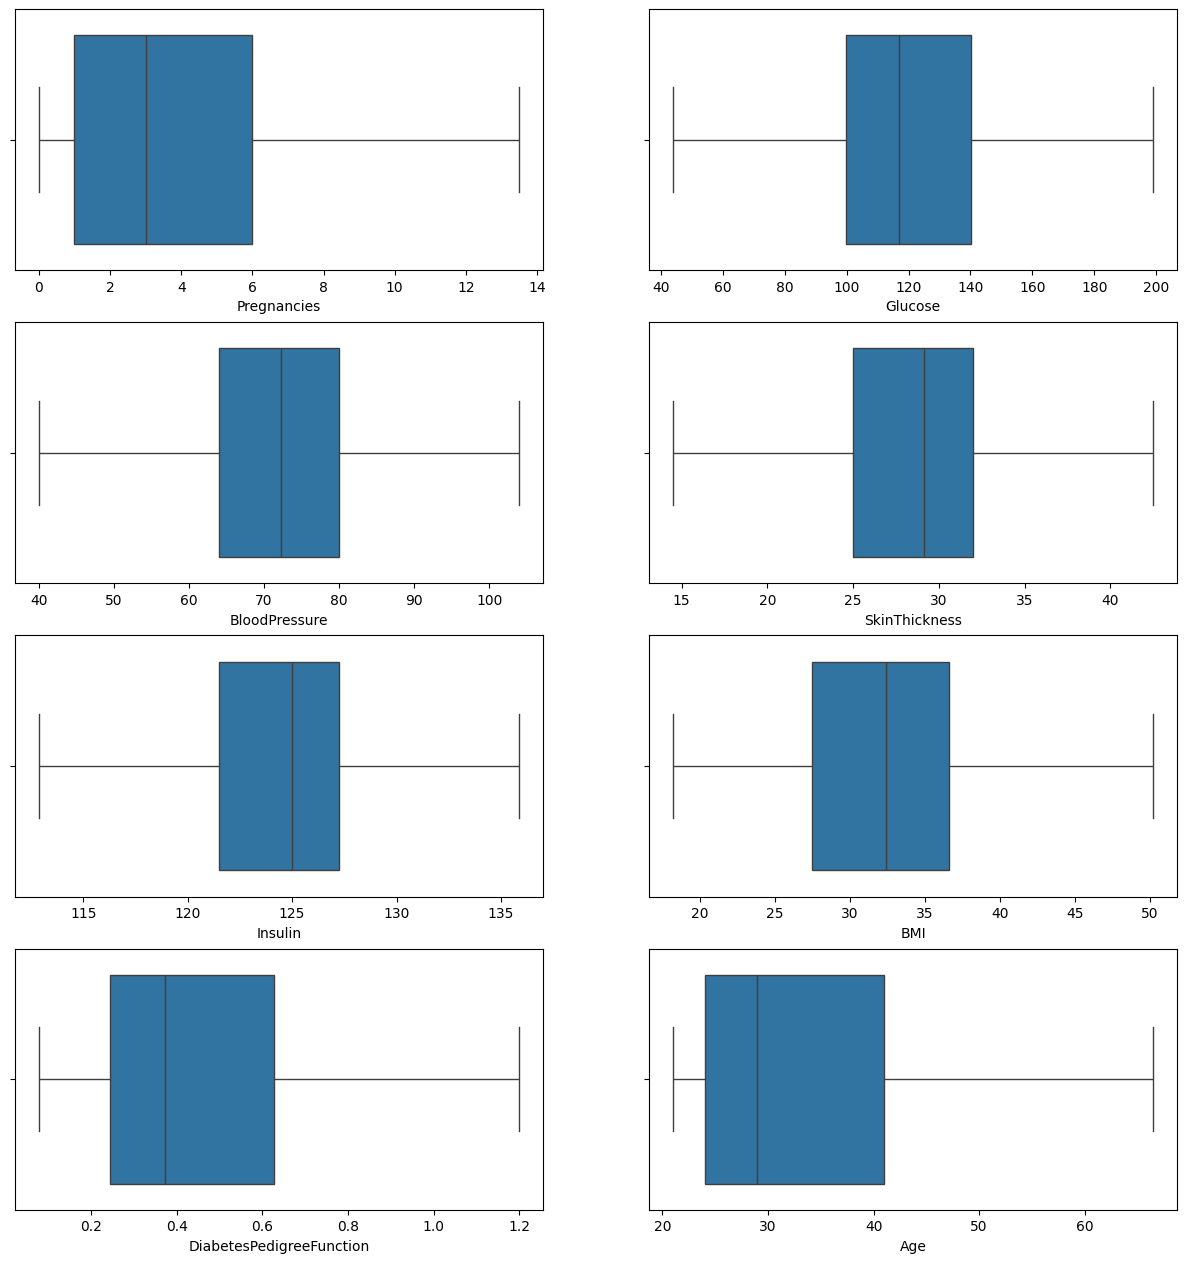

In [26]:
plt.figure(figsize=(15,40))
for i,column in enumerate(df.columns):
    if column != 'Outcome':
        plt.subplot(10,2,i+1)
        sns.boxplot(x=df[column])
plt.show()

In [27]:
# Feature and Target Separation
X = df.drop('Outcome',axis=1)
y = df.Outcome

In [28]:
# Train Test Split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

#### Handling Class Imbalance
- Using SMOTE to balance the data by generating synthetic samples for the minority class.

In [29]:
smote = SMOTE()
X_train_smote,y_train_smote = smote.fit_resample(X_train,y_train)

In [30]:
y_train_smote.value_counts()

Outcome
0    401
1    401
Name: count, dtype: int64

#### Feature Scaling

In [31]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

### Model Training and Evaluation

In [32]:
def predict(model):
    
    # Training Model
    model.fit(X_train_scaled,y_train_smote)
    
    # Predictions
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test,y_pred)
    report = classification_report(y_test,y_pred)
    
    # Displaying Results
    print(f'Accuracy Score:{acc}')
    print(f'Classification Report:\n{report}')
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d')
    plt.title(f'Confusion Matrix for {type(model).__name__}')
    plt.show()

#### Logistic Regression

Accuracy Score:0.7142857142857143
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.69      0.76        99
           1       0.58      0.76      0.66        55

    accuracy                           0.71       154
   macro avg       0.71      0.73      0.71       154
weighted avg       0.75      0.71      0.72       154



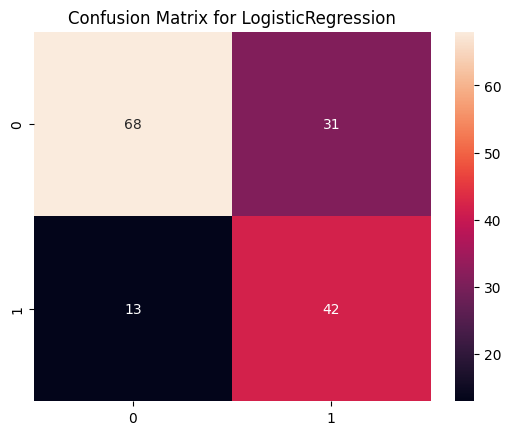

In [33]:
predict(LogisticRegression())

#### Naive Bayes

Accuracy Score:0.7207792207792207
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.66      0.75        99
           1       0.57      0.84      0.68        55

    accuracy                           0.72       154
   macro avg       0.73      0.75      0.72       154
weighted avg       0.77      0.72      0.73       154



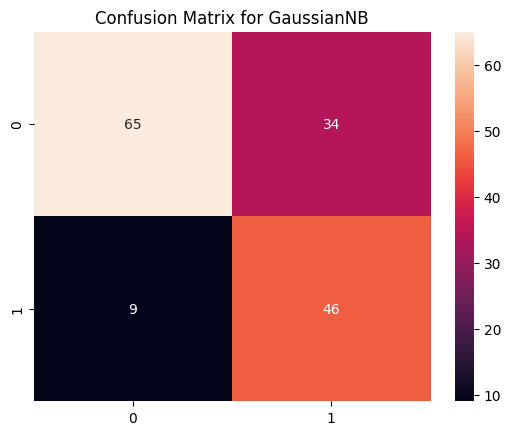

In [34]:
# GuassianNB(for binary classification)
predict(GaussianNB())

#### KNN

Accuracy Score:0.6623376623376623
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.60      0.69        99
           1       0.52      0.78      0.62        55

    accuracy                           0.66       154
   macro avg       0.67      0.69      0.66       154
weighted avg       0.72      0.66      0.67       154



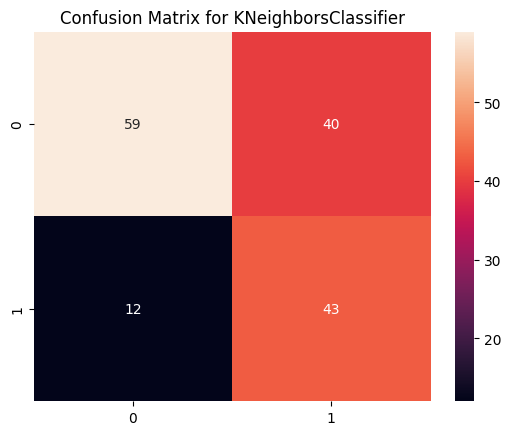

In [35]:
predict(KNeighborsClassifier())

#### SVM

Accuracy Score:0.7402597402597403
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.71      0.78        99
           1       0.60      0.80      0.69        55

    accuracy                           0.74       154
   macro avg       0.73      0.75      0.73       154
weighted avg       0.77      0.74      0.75       154



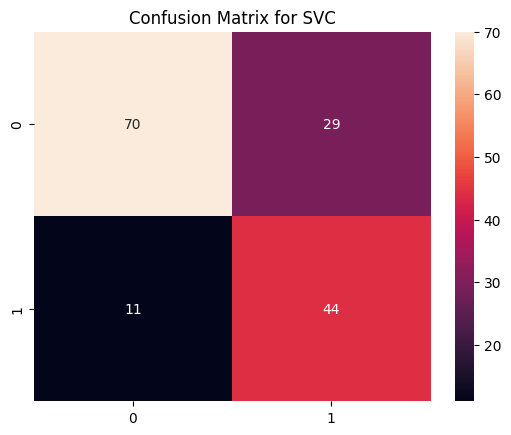

In [36]:
predict(SVC())

Among the tested models, SVM performs well, demonstrating strong predictive accuracy (74%) and a balanced precision and recall in classifying the data effectively.

In [39]:
# Selecting the best model 
svc = SVC()
svc.fit(X_train_scaled,y_train_smote)

SVC()

### Building a Predictive System

In [40]:
input_data = [[6,148,72,35,125,33.6,0.627,50]]
input_data_scaled = scaler.transform(input_data)
prediction = svc.predict(input_data_scaled)
if prediction[0] == 1:
    print('Diabetes')
else:
    print('No Diabetes')

Diabetes
